<a href="https://colab.research.google.com/github/SixDevelop/Intelligent_system_hw1/blob/main/Intelligent_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Добавление датасета

In [2]:
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
data = pd.read_csv(dataset_url, sep='\t')
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# 1. Вывести: количество наблюдений в датасете

In [3]:
data.shape[0]

4622

# 2. Вывести названия столбцов

In [4]:
list(data.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

# 3. Определить самую частую позицию (item) в заказе

In [5]:
data['item_name'].value_counts(normalize = True).index.tolist()[0]

'Chicken Bowl'

# 4. Построить гистограмму частоты заказов по позициям (item)

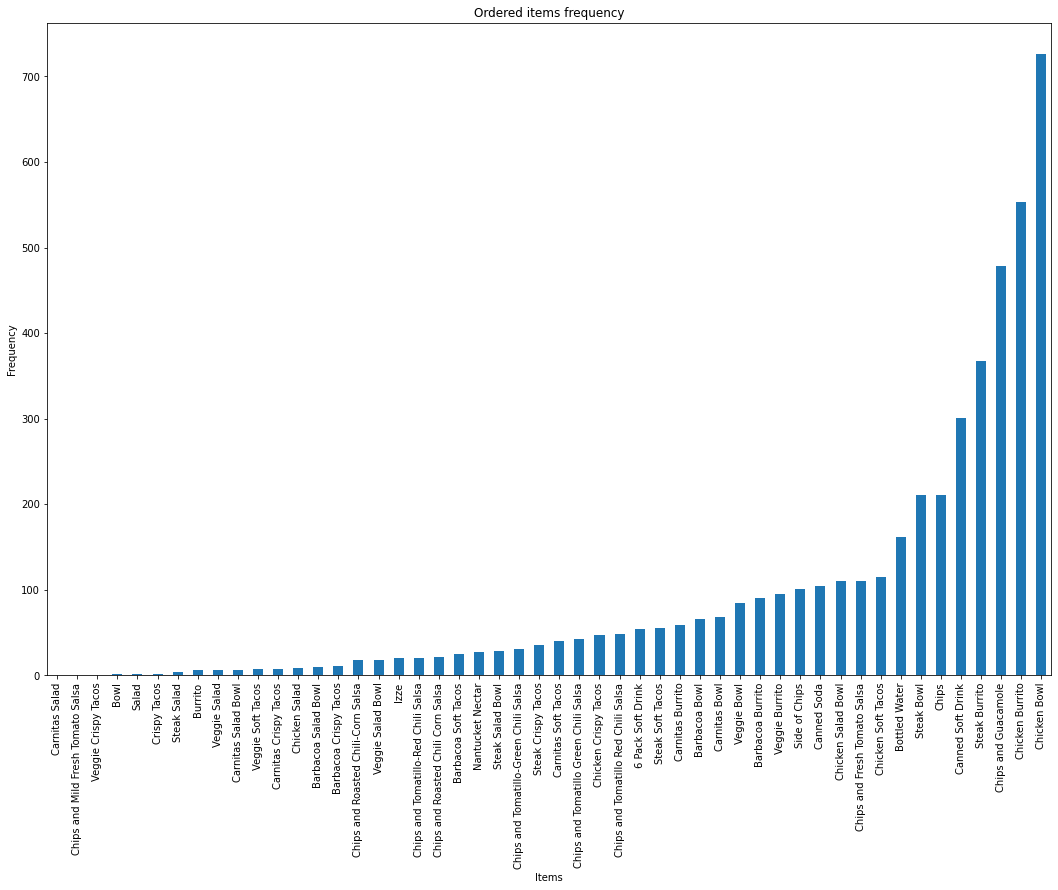

In [8]:
items = Counter(data.item_name)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar', figsize=(18, 12))
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Ordered items frequency')
plt.show()

# 5. Изменить тип переменной item_price c с помощью лямбды функции

In [7]:
data['item_price'] = data.apply(
    lambda x: float(x['item_price'].replace('$', '')),
    axis=1
)

# 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

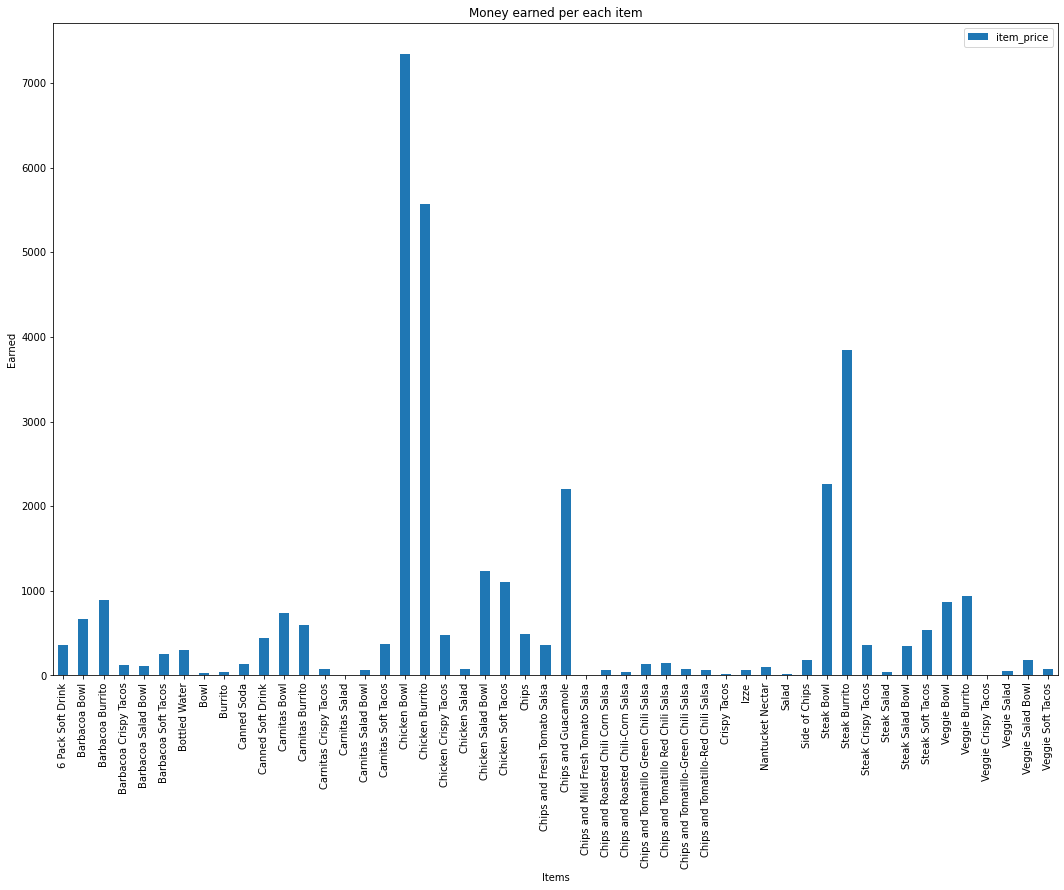

In [9]:
srs = data[['item_name', 'item_price']]
srs = srs.groupby('item_name').sum()

srs.plot(kind='bar', figsize=(18, 12))
plt.xlabel('Items')
plt.ylabel('Earned')
plt.title('Money earned per each item')
plt.show()

# 7. Средняя сумма заказа? (минимум 2 способа)

1 способ

In [12]:
average_price = round(
    data.item_price.sum() / data.order_id.nunique(),
    2
)
average_price

18.81

2 способ

In [16]:
average_price = round(
    data.groupby(
        'order_id',
        sort=False
    ).item_price.sum().mean(),
    2
)
average_price


18.81

# 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [17]:
group = data.groupby('order_id', sort=False).item_name.nunique().reset_index()
group.agg(
    {
        'item_name': ['mean', 'min', 'max', 'median']
    }
)

,item_name
mean,2.34024
min,1.00000
max,8.00000
median,2.00000


# 9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [18]:
steaks = data.loc[data['item_name'].str.contains('Steak')]
steaks.groupby('item_name')['quantity', 'item_price'].describe()

quantity                      ... item_price              
                      count      mean       std  ...        50%    75%    max
item_name                                        ...                         
Steak Bowl            211.0  1.047393  0.234278  ...       9.25  11.75  26.07
Steak Burrito         368.0  1.048913  0.239889  ...       9.25  11.75  27.75
Steak Crispy Tacos     35.0  1.028571  0.169031  ...       9.25  11.75  17.98
Steak Salad             4.0  1.000000  0.000000  ...       8.99   8.99   8.99
Steak Salad Bowl       29.0  1.068966  0.257881  ...      11.89  11.89  23.78
Steak Soft Tacos       55.0  1.018182  0.134840  ...       9.25   9.25  18.50

[6 rows x 16 columns]

# 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [21]:
data['r_price'] = round(data.item_price * 71.55, 2)

# 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

1. Заказы по входящим позициям

In [24]:
group_by_items = data.groupby('order_id', sort=False).agg(
    {
        'item_name': lambda x: ", ".join(x),
        'item_price': np.sum,
        'r_price': np.sum,
        'quantity': np.sum
    }
)

group_by_items[['quantity', 'item_name', 'item_price', 'r_price']]

,quantity,item_name,item_price,r_price
order_id,,,,
1,4,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,827.10
2,2,Chicken Bowl,16.98,1214.92
3,2,"Chicken Bowl, Side of Chips",12.67,906.54
4,2,"Steak Burrito, Steak Soft Tacos",21.00,1502.55
5,2,"Steak Burrito, Chips and Guacamole",13.70,980.24
...,...,...,...,...
1830,2,"Steak Burrito, Veggie Burrito",23.00,1645.65
1831,3,"Carnitas Bowl, Chips, Bottled Water",12.90,922.99
1832,2,"Chicken Soft Tacos, Chips and Guacamole",13.20,944.46


2. Стейки во свсех видах прожарки.

In [29]:
steaks.groupby('order_id').agg({'quantity':np.sum,
                                'item_name': lambda x: ", ".join(x), 
                                'item_price': np.sum})

,quantity,item_name,item_price
order_id,,,
4,2,"Steak Burrito, Steak Soft Tacos",21.00
5,1,Steak Burrito,9.25
16,1,Steak Burrito,8.99
20,1,Steak Burrito,11.75
21,1,Steak Burrito,8.99
...,...,...,...
1810,1,Steak Crispy Tacos,11.75
1818,1,Steak Salad Bowl,9.39
1829,1,Steak Burrito,11.75


# 12. Определить цену по каждой позиции в отдельности.

In [30]:
data['price_per_item'] = round(
    data['item_price'] / data['quantity'],
    2
)

data.groupby(['item_name']).agg(
    {
        'price_per_item': lambda x: x.unique()
    }
)

,price_per_item
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4
